## object-detection ref : https://towardsdatascience.com/object-detection-with-less-than-10-lines-of-code-using-python-2d28eebc5b11

## color-extraction ref : https://code.likeagirl.io/finding-dominant-colour-on-an-image-b4e075f98097

In [1]:
import cv2
import matplotlib.pyplot as plt
import cvlib as cv
from cvlib.object_detection import draw_bbox

import numpy as np
from sklearn.cluster import KMeans
from collections import Counter
import json

Using TensorFlow backend.


## 1. Load image file

>>> type of img     : <class 'numpy.ndarray'>
>>> size of matrix : (1349, 1080, 3)


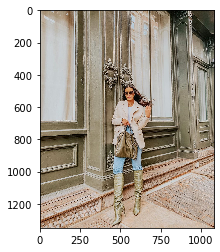

In [2]:
file_path = '../data/pictures_thecatwilliams/thecatwilliams_004_502Likes.png'
img = cv2.imread(file_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

print(f'>>> type of img     : {type(img)}')
print(f'>>> size of matrix : {img.shape}')
plt.imshow(img)
plt.show()

## 2. Detect the object 'person' from image

=== outputs ===
bounding boxes    : [[412, 449, 674, 1295]]
detected objects  : ['person']
confidence levels : [0.9972981810569763]



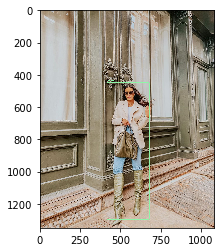

In [3]:
bbox, label, conf = cv.detect_common_objects(img)
print('=== outputs ===')
print(f'bounding boxes    : {bbox}')  # left_under_x, left_under_y, left_under_x + width, left_under_y + height
print(f'detected objects  : {label}')
print(f'confidence levels : {conf}\n')

if label.count('person') > 1:   # Exceptional case : 2 or more persons are detected
    print('>>> Warning : More than 1 person is detected from the given picture!')
    idx = label.index('person')
    bbox = [bbox[idx]]
    label = [label[idx]]
    conf = [conf[idx]]
    
    output_image = draw_bbox(img, bbox, label, conf)
    plt.imshow(output_image)
    plt.show()
elif 'person' in label:   # Ideal case : only one main preson is detected
    idx = label.index('person')
    bbox = [bbox[idx]]
    label = [label[idx]]
    conf = [conf[idx]]
    
    output_image = draw_bbox(img, bbox, label, conf)
    plt.imshow(output_image)
    plt.show()
else:   # Exceptional case : No person is detected
    print('>>> Warning : No person is detected from the given picture!')
    output_image = draw_bbox(img, bbox, label, conf)
    plt.imshow(output_image)
    plt.show()

## 3. Extract dominant colors of detected area (foreground)

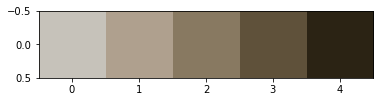

In [4]:
# arrange the cluster_centers of KMeans output according to frequency of each label
def arrange_cluster_centers(clt):
    lb_counts = Counter(clt.labels_)
    
    tmp_dict = {}
    for idx, pixel in enumerate(clt.cluster_centers_):
        tmp_dict[ lb_counts[idx] ] = pixel  # { frequency of label : color of label } mapping
    
    centers_aranged_dict = dict(sorted(tmp_dict.items(), reverse=True))  # arrange the dict according to key (frequency of label)

    centers_aranged_arr = np.array(list(centers_aranged_dict.values()))  # pack colors into one array
    centers_aranged_arr = centers_aranged_arr.round().astype("uint8")  # tranform the type to integer
    centers_aranged_arr = np.expand_dims(centers_aranged_arr, 0)  # add one dimension for visualization
    return centers_aranged_arr


expected_num_col = 5 #cluster number

# Extract dominant color using KMeans
img_reshape = img.reshape((img.shape[0] * img.shape[1],3)) #represent as row*column,channel number (appropriate format for KMeans)
clt = KMeans(n_clusters = expected_num_col)
clt.fit(img_reshape)

# Visualization
centers_aranged_arr = arrange_cluster_centers(clt)

plt.imshow(centers_aranged_arr)
plt.show()

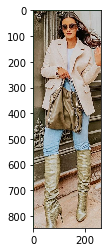

In [5]:
# compare to the original image
plt.imshow(img[bbox[0][1]:bbox[0][3], bbox[0][0]:bbox[0][2]])
plt.show()

## 4. Save top 2 colors into json

In [10]:
filename = file_path.split('/')[-1]

r_dict = {filename : centers_aranged_arr.tolist()[0][:2]}
r_json = json.dumps(r_dict)
r_json

'{"thecatwilliams_004_502Likes.png": [[198, 194, 186], [175, 160, 142]]}'